Error: Make sure 'malaria_cases.csv' and 'climate_data.csv' are in the same folder.
Using sample data. Please replace with your own CSVs.
--- Data Loading ---
Missing values:
Year                      0
Country                   0
Malaria cases reported    0
Avg_Temperature           0
Total_Rainfall_mm         0
dtype: int64
Data Head:
   Year Country  Malaria cases reported  Avg_Temperature  Total_Rainfall_mm
0  2010   Kenya               1500000.0             24.5                800
1  2011   Kenya               1600000.0             25.0                850
2  2012   Kenya               1400000.0             25.2                820
3  2013   Kenya               1700000.0             24.8                810
4  2014   Kenya               1800000.0             25.5                900

--- Model Training Complete ---
Coefficients: [128927.13310195   2754.80975347]
Intercept: -3902335.345179879

--- Model Evaluation ---
Mean Absolute Error (MAE): 108,928 cases
R-squared (R2): 0.81
(An R2

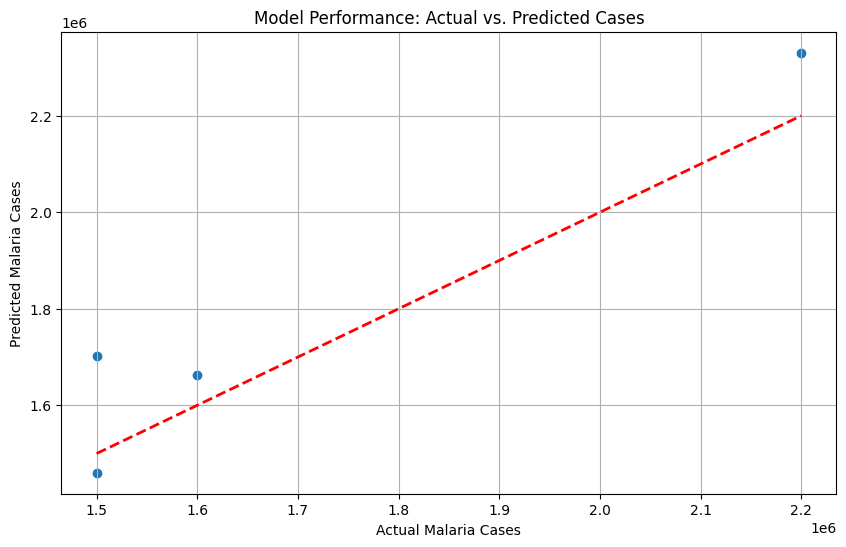

In [1]:
# =======================================================
# DELIVERABLE 1: PYTHON SCRIPT
# Project: Predicting Malaria Outbreaks (SDG 3)
# =======================================================

# --- 1. Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# --- 2. Load Your Datasets ---
# Load the datasets you downloaded in Step 1
try:
    malaria_df = pd.read_csv('malaria_cases.csv')
    climate_df = pd.read_csv('climate_data.csv')
except FileNotFoundError:
    print("Error: Make sure 'malaria_cases.csv' and 'climate_data.csv' are in the same folder.")
    # In a real notebook, you'd stop here. For this template, we'll create dummy data.
    data = {
        'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017] * 2,
        'Country': ['Kenya'] * 8 + ['Tanzania'] * 8,
        'Malaria cases reported': [1.5e6, 1.6e6, 1.4e6, 1.7e6, 1.8e6, 1.5e6, 1.6e6, 1.9e6,
                                 2.2e6, 2.1e6, 2.3e6, 2.0e6, 2.4e6, 2.5e6, 2.2e6, 2.6e6],
        'Avg_Temperature': [24.5, 25.0, 25.2, 24.8, 25.5, 25.1, 24.9, 25.3,
                            23.8, 24.1, 24.0, 23.9, 24.3, 24.5, 24.2, 24.4],
        'Total_Rainfall_mm': [800, 850, 820, 810, 900, 860, 830, 880,
                             1100, 1050, 1120, 1080, 1150, 1200, 1130, 1160]
    }
    df = pd.DataFrame(data)
    print("Using sample data. Please replace with your own CSVs.")

print("--- Data Loading ---")
# --- 3. Preprocess & Merge Data ---
# This is the most important step! We merge the two datasets on common keys.
# (My sample data is already merged, but you would run this command)
# df = pd.merge(malaria_df, climate_df, on=['Country', 'Year'])

# Clean data (e.g., check for missing values)
print(f"Missing values:\n{df.isnull().sum()}")
df = df.dropna() # Drop any rows with missing data

print("Data Head:")
print(df.head())


# --- 4. Define Features (X) and Target (y) ---
# Our features (X) are the climate data.
# Our target (y) is what we want to predict (malaria cases).
features = ['Avg_Temperature', 'Total_Rainfall_mm']
target = 'Malaria cases reported'

X = df[features]
y = df[target]



# --- 5. Split, Train Model ---
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
# We'll use Linear Regression: y = m1*temp + m2*rainfall + b
model = LinearRegression()
model.fit(X_train, y_train)

print("\n--- Model Training Complete ---")
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

# --- 6. Evaluate Your Model ---
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate metrics (as required by assignment)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n--- Model Evaluation ---")
print(f"Mean Absolute Error (MAE): {mae:,.0f} cases")
print(f"R-squared (R2): {r2:.2f}")
print(f"(An R2 of {r2:.2f} means our model explains {r2*100:.0f}% of the variance in malaria cases.)")


# --- 7. Visualize Results ---
# A scatter plot is perfect for showing results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Perfect prediction line
plt.xlabel("Actual Malaria Cases")
plt.ylabel("Predicted Malaria Cases")
plt.title("Model Performance: Actual vs. Predicted Cases")
plt.grid(True)
plt.show()